# 서포트 벡터 머신 (Support Vector Machine, SVM)

- 이진 클래스에 대한 분류 기법 중 하나
- 두 개의 클래스를 구분하는 경계(boundary)들 중 **클래스들 사이의 최적의 경계**를 찾는다
- 두 개의 클래스를 구분하는 경계선은 무수히 많다. 이들 중 가장 **적합한 경계선을 긋는 것**이 SVM의 목표

## 용어정리

### 마진 (margin)
- 클래스들 사이의 간격, 즉 여백
- 각 클래스들의 말단에 위치한 데이터들 사이의 거리에 해당

![](../img/SVM_margin.png)

### 초평면 (hyperplane)
- 한 영역을 두 개의 부분으로 나누는 결정 경계 (decision boundary)
- 데이터를 분리하는 초평면은 무한히 많이 존재
- 예를 들어, 2차원 공간 영역을 나누는 경계는 직선이고 3차원 공간을 나누는 경계는 평면
- 일반적으로 표현해서, **초평면은 N차원 공간을 (N–1)차원으로 나누는** 경계

![](../img/SVM_hyperplane.png)

### 서포트 벡터 (support vector)
- 마진에서 서로 가장 가까이 위치해 있는 데이터
- 이 데이터들의 위치에 따라 초평면의 위치도 달라질 것이다. 즉, 이 값들은 초평면 함수를 지지(support)
- 데이터 값이 달라지면 초평면도 달라지기 때문

![](../img/SVM_support_vector.png)

## 서포트 벡터 머신의 개념 요약
- 데이터를 분리하는 최적의 초평면(hyperplane), 즉 **최적의 결정 경계(decision boundary)**를 찾는 기법
- 결국, **최대 마진(maximum margin)이 되도록** 클래스를 구분하는 것이 기본적인 목적

![](../img/SVM_concept.png)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

## 선형 SVM (Linear SVM)
- 데이터를 선형으로 구분하는 최적의 초평면을 찾는 기법
- 선형 SVM은 두 가지 경우로 구분
    - 하드 마진 (hard margin) 분류 : 두 개의 클래스에 대해 최대 마진이 되는 초평면을 찾는다
    - 소프트 마진 (soft margin) 분류 : 하드 마진 분류에서 초평면이 존재하지 않을 때, 오분류를 허용하여 찾는다

## 하드 마진 (Hard Margin) 분류
- 두 개의 클래스에 대해 최대 마진이 되는 초평면을 찾는다. 이와 같이 하드 마진 분류를 수행하는 선형 SVM을 최대 마진 분류기(maximum margin classifier)
- **모든 훈련 데이터들은 마진의 바깥쪽에 위치**하게 된다
- 데이터들이 정확하게 선형적으로 구분되는 경우에만 분류가 가능

## 하드 마진 분류의 한계
- 모든 경우에 반드시 초평면이 존재하는 것은 아니다
- 데이터가 정확하게 선형적으로 구분되지 않는 경우에는 결정 경계를 찾는 것이 불가능
- 분류 모형이 일반화되기 어렵다
- 이상치가 존재할 경우, 초평면이 없거나 잘 일반화되지 않는다
![](../img/SVM_hard_margin_limit.png)

## 사이킷런으로 선형 SVM (하드 마진) 분류 수행 - LinearSVC

### svm 모듈에 있는 LinearSVC를 이용하여 선형 SVM 객체를 생성

In [41]:
import sklearn.svm as svm
svm_clf = svm.LinearSVC() # Support Vector Classifier

In [42]:
X_train = [[1,2],[5,6],[2,3],[6,7],[3,1],[7,5]]
y_train = [0,1,0,1,0,1]

### 선형 SVM 객체에 대하여 fit 메소드를 이용하여 훈련

In [43]:
clf = svm_clf.fit(X_train,y_train)

### 실행 객체 또는 분류 모형에 대하여 predict 메소드를 이용하여 예측을 수행

In [44]:
X_test = [[1.5, 3.1],[4, 4.5],[6.7, 4.7]]
y_test = [0,0,1]

In [45]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1])

### 분석 결과를 평가한다. (정확도)

In [46]:
import sklearn.metrics as mt
mt.accuracy_score(y_test,y_pred)

0.6666666666666666

In [47]:
# 위와 같은 코드라고 생각할 수 있음
clf.score(X_test,y_test)

0.6666666666666666

## 사이킷런으로 선형 SVM (하드 마진) 분류 수행 - SVC

### svm 모듈에 있는 LinearSVC를 이용하여 선형 SVM 객체를 생성

In [48]:
import sklearn.svm as svm
svm_clf = svm.SVC(kernel='linear') # Support Vector Classifier

In [49]:
X_train = [[1,2],[5,6],[2,3],[6,7],[3,1],[7,5]]
y_train = [0,1,0,1,0,1]

### 선형 SVM 객체에 대하여 fit 메소드를 이용하여 훈련

In [50]:
clf = svm_clf.fit(X_train,y_train)

### 실행 객체 또는 분류 모형에 대하여 predict 메소드를 이용하여 예측을 수행

In [51]:
X_test = [[1.5, 3.1],[4, 4.5],[6.7, 4.7]]
y_test = [0,0,1]

In [52]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1])

### 분석 결과를 평가한다. (정확도)

In [53]:
import sklearn.metrics as mt
mt.accuracy_score(y_test,y_pred)

0.6666666666666666

In [54]:
# 위와 같은 코드라고 생각할 수 있음
clf.score(X_test,y_test)

0.6666666666666666

## LinearSVC vs SVC
- LinearSVC : 선형 분류 전용
- SVC : 선형인 경우, 비선형인 경우 모두 가능하다
![](../img/SVM_svc_vs_linear_svc.png)

## SVM의 스케일링
- SVM은 데이터 특성의 스케일에 민감
- 아래와 같이 X축보다 Y축 값들의 스케일이 훨씬 크면 결정 경계가 거의 수평에 가깝게 된다
- 특성 값의 스케일 차이로 인해, 결정 경계가 거의 수평선으로 표현되는 것을 확인

In [55]:
import sklearn.svm as svm

# X_train = [[1,2],[5,6],[2,3],[6,7],[3,1],[7,5]]
X_train = [[item[0],item[1]*10] for item in X_train]
y_train = [0,1,0,1,0,1]

![](../img/SVM_standscaler_before.png)

In [56]:
svm_clf = svm.SVC(kernel='linear')

In [57]:
clf = svm_clf.fit(X_train,y_train)

- 스케일링을 통해, 보다 적합한 결정 경계를 도출
- preprocessing 모듈의 StandardScaler에서 fit_transform 메소드를 이용하여 표준 정규 분포로 전처리

In [58]:
import sklearn.svm as svm
import sklearn.preprocessing as pp

# X_train = [[1,2],[5,6],[2,3],[6,7],[3,1],[7,5]]
X_train = [[item[0],item[1]*10] for item in X_train]
y_train = [0,1,0,1,0,1]

svm_clf = svm.SVC(kernel='linear')

scl = pp.StandardScaler()
X_train = scl.fit_transform(X_train) # 원본날아감

clf = svm_clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1])

- 스케일링을 통해, 보다 적합한 결정 경계를 도출
- 스케일을 조정한 결과, 원래의 경우보다 더 나은 결정 경계가 표현되는 것을 확인가능
![](../img/SVM_standscaler.png)

##  2차원 데이터 분류에서의 결정경계

### 선형 SVM 분류의 초평면 (결정 경계)
- 2차원 데이터에 대한 결정 경계 식은 다음과 같이 쓸 수 있다
$$ w_0 + w_1X + w_2Y = 0 $$

- 이 때, 각 w_i는 계수와 절편이다

- 이 식을 y에 대해서 정리하면 다음과 같다

$$ y = -\frac{w_1}{w_2}X - \frac{w_0}{w_2} $$

### 사이킷런의 실행 결과
- 분류 모형의 결과로 계수와 절편 값이 들어 있으며, 계수는 coef_ 속성, 절편은 intercept_ 속성에 값이 할당

In [148]:
# coef_ : [w0,w1]
# intercept_ : [w0]

X_train = [[1,2],[5,6],[2,3],[6,7],[3,1],[7,5]]
y_train = [0,1,0,1,0,1]

# svm_clf = svm.SVC(kernel='linear') # svm.LinearSVC()
svm_clf = svm.LinearSVC()

clf = svm_clf.fit(X_train,y_train)

In [149]:
print(clf.coef_)
print(clf.intercept_)

[[0.18178586 0.19121373]]
[-1.36775345]


In [150]:
xx = np.linspace(0,8)

yy = -(clf.coef_[0][0] / clf.coef_[0][1]) * xx - clf.intercept_ / clf.coef_[0][1]

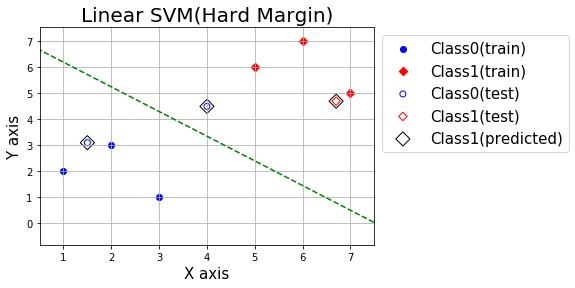

In [151]:
colors = ['blue', 'red']
markers = ['o', 'D']
label_train = ['Class0(train)', 'Class1(train)']
label_test = ['Class0(test)', 'Class1(test)']
label_pred = ['Class0(predicted)', 'Class1(predicted)']

# 결정 경계선 표현
plt.plot(xx, yy, color='green', linestyle='--')

# Train 데이터 표현
for t in set(y_train):
    X_pts = [X_train[i][0]
             for i in range(len(y_train)) if y_train[i] == t]  # 한줄을 표현
    Y_pts = [X_train[i][1]
             for i in range(len(y_train)) if y_train[i] == t]
    plt.scatter(X_pts, Y_pts,
                color=colors[t],
                marker=markers[t],
                label=label_train[t])
    
# Test 데이터 표현
for t in set(y_test):
    X_pts = [X_test[i][0]
             for i in range(len(y_test)) if y_test[i] == t]  # 한줄을 표현
    Y_pts = [X_test[i][1]
             for i in range(len(y_test)) if y_test[i] == t]
    plt.scatter(X_pts, Y_pts,
                edgecolor=colors[t],
                facecolor='none',
                marker=markers[t],
                label=label_test[t])
    
# Predicted 데이터 표현
for t in set(y_pred):
    X_pts = [X_test[i][0]
             for i in range(len(y_pred)) if y_pred[i] == t]  # 한줄을 표현
    Y_pts = [X_test[i][1]
             for i in range(len(y_pred)) if y_pred[i] == t]
    plt.scatter(X_pts, Y_pts,
                edgecolor='black',
                facecolor='none',
                marker=markers[t],
                label=label_pred[t],
                s=100)

plt.legend(loc='best',
           fontsize=15,
           bbox_to_anchor=(1,1)) # legend를 밖으로 내보내기 위해
plt.title('Linear SVM(Hard Margin)',fontsize=20)
plt.xlabel('X axis',fontsize=15)
plt.ylabel('ㅠY axis',fontsize=15)
plt.xlim(0.5,7.5)
plt.grid()
plt.show()

## 예제 : 붓꽃 데이터

1. 특성은 꽃잎의 길이와 너비
2. 레이블은
    1. virginica인지, 아닌지
    2. setosa인지, 아닌지
3. 위의 레이블들로 각각 분류를 수행 (총 2회의 학습을 개별적으로)
4. 플롯, 산포도를 표시, 데이터와 결정 경계
5. 학습/검증 데이터를 분리하지 않음

In [183]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [184]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [185]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [186]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [187]:
iris_data = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data['label'] = iris.target
iris_data['isSetosa'] = [True if i ==0 else False for i in iris_data['label']]
iris_data['isViginica'] = [True if i ==2 else False for i in iris_data['label']]

In [188]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,isSetosa,isViginica
0,5.1,3.5,1.4,0.2,0,True,False
1,4.9,3.0,1.4,0.2,0,True,False
2,4.7,3.2,1.3,0.2,0,True,False
3,4.6,3.1,1.5,0.2,0,True,False
4,5.0,3.6,1.4,0.2,0,True,False
5,5.4,3.9,1.7,0.4,0,True,False
6,4.6,3.4,1.4,0.3,0,True,False
7,5.0,3.4,1.5,0.2,0,True,False
8,4.4,2.9,1.4,0.2,0,True,False
9,4.9,3.1,1.5,0.1,0,True,False


In [164]:
X = iris.data
y = iris.target

In [165]:
c_set = ['blue','red','green']
m_set = ['o','x','^']
l_set = iris.target_names

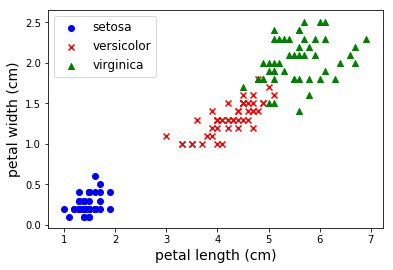

In [167]:
for t in set(y):
    x_pts = [X[i,2] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,3] for i in range(len(y)) if y[i] == t]
    plt.scatter(x_pts,y_pts,color=c_set[t],marker=m_set[t],label=l_set[t])

plt.xlabel(iris.feature_names[2],fontsize=14)
plt.ylabel(iris.feature_names[3],fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.show()

In [213]:
iris_data[iris_data.isViginica == True][['petal length (cm)','petal width (cm)']]

,petal length (cm),petal width (cm)
100,6.0,2.5
101,5.1,1.9
102,5.9,2.1
103,5.6,1.8
104,5.8,2.2
105,6.6,2.1
106,4.5,1.7
107,6.3,1.8
108,5.8,1.8
109,6.1,2.5


In [214]:
iris_data[iris_data.isViginica == True][['label']]

,label
100,2
101,2
102,2
103,2
104,2
105,2
106,2
107,2
108,2
109,2


In [199]:
len(iris_data[iris_data.isViginica == True][['petal length (cm)','petal width (cm)']])

50

In [200]:
len(iris_data[iris_data.isViginica == True][['label']])

50

In [224]:
svm_clf = svm.SVC(kernel='linear')
clf = svm_clf.fit(iris_data[iris_data.isViginica == True][['petal length (cm)','petal width (cm)']],
                  iris_data[iris_data.isViginica == True][['label']])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

## 예제 - 강사님 답안

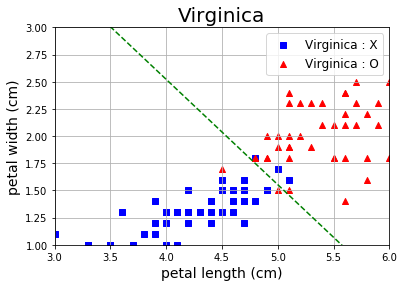

In [260]:
X = iris.data[:,(2,3)]
y = (iris.target == 2).astype(np.int)

clf = svm.SVC(kernel='linear').fit(X,y)

c_set = ['blue','red']
m_set = ['s','^']
l_set = ['Virginica : X','Virginica : O']

xx = np.linspace(1,7)
yy = -(clf.coef_[0][0] / clf.coef_[0][1]) * xx - clf.intercept_ / clf.coef_[0][1]

for t in set(y):
    x_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]
    plt.scatter(x_pts,y_pts,color=c_set[t],marker=m_set[t],label=l_set[t])

plt.plot(xx, yy, color='green', linestyle='--')

plt.xlabel(iris.feature_names[2],fontsize=14)
plt.ylabel(iris.feature_names[3],fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.title('Virginica',fontsize=20)
plt.axis([3,6,1,3])
plt.grid()
plt.show()

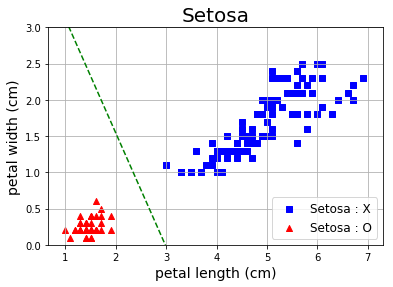

In [261]:
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

clf = svm.SVC(kernel='linear').fit(X,y)

c_set = ['blue','red']
m_set = ['s','^']
l_set = ['Setosa : X','Setosa : O']

xx = np.linspace(1,7)
yy = -(clf.coef_[0][0] / clf.coef_[0][1]) * xx - clf.intercept_ / clf.coef_[0][1]

for t in set(y):
    x_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]
    plt.scatter(x_pts,y_pts,color=c_set[t],marker=m_set[t],label=l_set[t])

plt.plot(xx, yy, color='green', linestyle='--')

plt.xlabel(iris.feature_names[2],fontsize=14)
plt.ylabel(iris.feature_names[3],fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.ylim(0,3)
plt.title('Setosa',fontsize=20)
plt.grid()
plt.show()

## 초평면과 결정 경계에 따른 값의 분포
- 양성 초평면 : 결과 값이 +1 이상이 되는 초평면 영역
- 음성 초평면 : 결과 값이 –1 이하가 되는 초평면 영역
- 결정 경계 : 이 경계 상에 있는 데이터의 결과 값은 0
    - 데이터의 결과 값이 0 이상이면 클래스 1로 분류
    - 데이터의 결과 값이 0 미만이면 클래스 0으로 분류

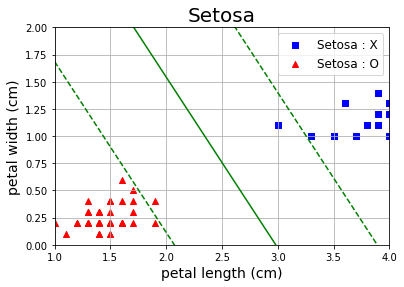

In [264]:
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

clf = svm.SVC(kernel='linear').fit(X,y)

c_set = ['blue','red']
m_set = ['s','^']
l_set = ['Setosa : X','Setosa : O']

margin = 1 / clf.coef_[0][1]
xx = np.linspace(1,7)
yy = -(clf.coef_[0][0] / clf.coef_[0][1]) * xx - clf.intercept_ / clf.coef_[0][1]
yy_up = yy + margin
yy_down = yy - margin

for t in set(y):
    x_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]
    plt.scatter(x_pts,y_pts,color=c_set[t],marker=m_set[t],label=l_set[t])

plt.plot(xx, yy, color='green', linestyle='-')
plt.plot(xx, yy_up, color='green', linestyle='--')
plt.plot(xx, yy_down, color='green', linestyle='--')

plt.xlabel(iris.feature_names[2],fontsize=14)
plt.ylabel(iris.feature_names[3],fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.ylim(0,3)
plt.title('Setosa',fontsize=20)
plt.axis([1,4,0,2])
plt.grid()
plt.show()